### Telecom Churn Project 

#### In this we will build telecom predictive models to :-  

1) Predict which customers are at high risk of churn ie; high-value customers.      
2) Identify the main indicators of churn.     
3) Conclusion - recommend strategies to manage customer churn based on our observations.   

### Data Understanding and Cleaning.

In [1]:
## Import Libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')

#### Read the file.

In [2]:
## Read the file and look for the columns having Nan and blanks/missing values.
telecom = pd.read_csv("D:\\telecom_churn_data.csv", encoding='latin1')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [4]:
# Let's understand the type of columns. 
# Summary - 99999 rows, 226 columns.
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# let's look at the statistical aspects of the dataframe.
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Handling Missing Values & Impute the Features.

In [6]:
# Checking the Missing Values/Blanks etc. 
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((telecom.isna().sum()/len(telecom))*100).reset_index().rename(columns = {'index': 'Feature', 0: 'Missing_Feature%'}).sort_values('Missing_Feature%',ascending = False)
missing_values

,Feature,Missing_Feature%
189,arpu_3g_6,74.85
197,night_pck_user_6,74.85
161,total_rech_data_6,74.85
193,arpu_2g_6,74.85
165,max_rech_data_6,74.85
...,...,...
146,max_rech_amt_7,0.00
145,max_rech_amt_6,0.00
144,total_rech_amt_9,0.00
143,total_rech_amt_8,0.00


From the above is it found that we have 40 features where the Missing_Feature% (null) is more than 70%. We will drop them first.

In [7]:
telecom = telecom.drop(['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 
                           'fb_user_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
                           'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7',
                           'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'total_rech_data_9',
                           'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9',
                           'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'av_rech_amt_data_9', 'total_rech_data_8',
                           'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'count_rech_3g_8',
                           'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8'], axis=1)
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

Here we will find out how many features are having less than 70% of null values.

In [8]:
telecom_filter_1 = pd.DataFrame(missing_values[missing_values['Missing_Feature%'] <= 70])
telecom_filter_1.head()

,Feature,Missing_Feature%
136,ic_others_9,7.75
68,std_og_mou_9,7.75
64,std_og_t2c_mou_9,7.75
132,isd_ic_mou_9,7.75
120,std_ic_mou_9,7.75


From the above step we found that we have 186 features with less than 70% null values. Now we will find out how many columns
out of 186 features are having zero missing_feature%.

In [9]:
## No need to impute for these features. These 60 features are having non-null values.
telecom_filter_2 = pd.DataFrame(telecom_filter_1[telecom_filter_1['Missing_Feature%'] == 0.00])
telecom_filter_2.head()

,Feature,Missing_Feature%
215,sachet_3g_8,0.00
223,jul_vbc_3g,0.00
222,aug_vbc_3g,0.00
221,aon,0.00
224,jun_vbc_3g,0.00


We found that we have 60 features where the missing_feature% is zero, which means there are no null values for these features.   
This means now we are left with only 126 features ( 126 + 60 = 186 features ) where we need to impute the values to process.

### Below is the list of features where we need to impute zeros. 

In [10]:
# Total 126 features out of 186 where 60 features are non-null values.
telecom_filter_3 = pd.DataFrame(telecom_filter_1[telecom_filter_1['Missing_Feature%'] != 0])
telecom_filter_3.head() 

,Feature,Missing_Feature%
136,ic_others_9,7.75
68,std_og_mou_9,7.75
64,std_og_t2c_mou_9,7.75
132,isd_ic_mou_9,7.75
120,std_ic_mou_9,7.75


### Creating the list of features to impute zeros.

In [11]:
## Below is the list of features(126) to impute with zeros.

telecom_zero_impute = ['ic_others_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9', 'std_ic_mou_9', 'isd_og_mou_9','spl_og_mou_9',
'spl_ic_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'loc_ic_t2f_mou_9',
'loc_ic_mou_9', 'std_ic_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'roam_og_mou_9',
'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2m_mou_9',
'onnet_mou_9', 'onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8',
'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_ic_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'offnet_mou_8',
'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'ic_others_8', 'og_others_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8',
'std_og_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8',
'loc_og_mou_8', 'std_og_mou_8', 'date_of_last_rech_9', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6',
'isd_ic_mou_6', 'spl_ic_mou_6', 'std_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6',
'std_og_t2t_mou_6', 'spl_og_mou_6', 'loc_og_mou_6', 'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
'loc_og_t2t_mou_6', 'roam_og_mou_6', 'std_ic_t2t_mou_6', 'onnet_mou_6', 'loc_ic_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'loc_og_t2t_mou_7', 'offnet_mou_7', 'loc_og_t2f_mou_7',
'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'std_og_t2m_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7',
'std_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'isd_og_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7',
'loc_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'og_others_7', 'spl_og_mou_7', 'isd_ic_mou_7',
'std_ic_t2o_mou_7', 'std_og_mou_7', 'date_of_last_rech_8', 'date_of_last_rech_7', 'last_date_of_month_9', 'date_of_last_rech_6',
'last_date_of_month_8', 'loc_ic_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2o_mou', 'last_date_of_month_7' ]

#### Impute missing values with 0.

In [12]:
telecom[telecom_zero_impute] = telecom[telecom_zero_impute].apply(lambda x: x.fillna(0))
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

#### Checking again to confirm that there are no-null values.

In [13]:
pd.options.display.float_format = '{:.2f}'.format
missing_values1 = pd.DataFrame((telecom.isna().sum()/len(telecom))*100).reset_index().rename(columns = {'index': 'Feature', 0: 'Missing_Feature%'}).sort_values('Missing_Feature%',ascending = False)
missing_values1.head()

,Feature,Missing_Feature%
0,mobile_number,0.00
127,spl_ic_mou_8,0.00
118,std_ic_mou_7,0.00
119,std_ic_mou_8,0.00
120,std_ic_mou_9,0.00


#### Dropping dates/mobile_number and circle_id features.

In [14]:
# Drop the date columns, mobile_number and circle_id.
telecom_churn = telecom.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 
           'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','circle_id', 'mobile_number'], axis=1)

telecom_churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.00,0.00,0.00,197.38,214.82,213.80,21.10,0.00,0.00,0.00,...,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,...,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,167.69,189.06,210.23,290.71,11.54,55.24,37.26,...,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,0.00,0.00,0.00,221.34,251.10,508.05,389.50,99.91,54.39,310.98,...,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,261.64,309.88,238.17,163.43,50.31,149.44,83.89,...,0,0,0,0,0,1526,0.00,0.00,0.00,0.00


In [15]:
## Looking at the info again. Summary - 99999 rows, 177 columns, no null-values.
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 177 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(143), int64(33), object(1)
memory usage: 135.0+ MB


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Filter high-value customers.

Definition of High Value Customers - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).   
First take average recharge amount in the first two months (the good phase).
Then calculate 70th percentile. We need to get 30 K rows.   
Action Phase --> It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

In [16]:
## Taking the average of 1st two months ( June & July - Good phase ).
telecom_col = telecom_churn.loc[: , "total_rech_amt_6":"total_rech_amt_7"]
telecom_col.head()

,total_rech_amt_6,total_rech_amt_7
0,362,252
1,74,384
2,168,315
3,230,310
4,196,350


In [17]:
## Creating a new column that shows the mean of good phase - June & July.
telecom_churn['Avg_rech_amt'] = telecom_col.mean(axis=1, skipna=True) ## skip the Na values while finding the mean.
telecom_churn

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_rech_amt
0,0.00,0.00,0.00,197.38,214.82,213.80,21.10,0.00,0.00,0.00,...,0,0,0,0,968,30.40,0.00,101.20,3.58,307.00
1,0.00,0.00,0.00,34.05,355.07,268.32,86.28,24.11,78.68,7.68,...,0,0,0,0,1006,0.00,0.00,0.00,0.00,229.00
2,0.00,0.00,0.00,167.69,189.06,210.23,290.71,11.54,55.24,37.26,...,0,0,0,0,1103,0.00,0.00,4.17,0.00,241.50
3,0.00,0.00,0.00,221.34,251.10,508.05,389.50,99.91,54.39,310.98,...,0,0,0,0,2491,0.00,0.00,0.00,0.00,270.00
4,0.00,0.00,0.00,261.64,309.88,238.17,163.43,50.31,149.44,83.89,...,0,0,0,0,1526,0.00,0.00,0.00,0.00,273.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.00,0.00,0.00,18.47,69.16,57.53,29.95,5.40,3.36,5.91,...,0,0,0,0,3199,0.00,0.00,0.00,0.00,85.00
99995,0.00,0.00,0.00,112.20,77.81,79.08,140.84,29.26,18.13,16.06,...,0,0,0,0,2052,0.00,0.00,0.00,0.00,110.00
99996,0.00,0.00,0.00,229.19,0.00,0.00,0.00,1.11,0.00,0.00,...,0,0,0,0,185,0.00,0.00,0.00,0.00,59.50
99997,0.00,0.00,0.00,322.99,303.39,606.82,731.01,0.00,0.00,0.00,...,1,0,0,0,478,1445.74,1151.03,1173.18,0.00,369.50


#### Finding 70th Percentile.

In [18]:
print("Recharge amount at 70th percentile is ==> {0}".format(telecom_churn.Avg_rech_amt.quantile(0.7)))

Recharge amount at 70th percentile is ==> 368.5


#### Now we will retain only those customers who have recharged more than or equal to 70th percentile amount.

In [19]:
high_value_customer = telecom_churn.loc[telecom_churn.Avg_rech_amt > telecom_churn.Avg_rech_amt.quantile(0.7), :]
high_value_customer = high_value_customer.reset_index(drop=True)
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 178 entries, loc_og_t2o_mou to Avg_rech_amt
dtypes: float64(144), int64(33), object(1)
memory usage: 40.7+ MB


We have approximately 30K high value customers at 70th Percentile.

### Predict whether a high-value customer will churn or not, in near future, if churn : 1 else 0.

In [20]:
# Find out total incoming and outgoing minutes of usage.
high_value_customer['total_calls_in_out_9'] = high_value_customer.total_ic_mou_9 + high_value_customer.total_og_mou_9

In [21]:
# Find out 2g and 3g data consumption.
high_value_customer['total_internet_mb_9'] =  high_value_customer.vol_2g_mb_9 + high_value_customer.vol_3g_mb_9

In [22]:
# Predict whether a high-value customer will churn or not, in near future, if churn : 1 else 0.
# If a customer did not use any calls or internet In September then customer would have churned out.

# 0 - not churn, 1 - churn
high_value_customer['telecom_churn'] = high_value_customer.apply(lambda row: 1 if (row.total_calls_in_out_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [23]:
high_value_customer.telecom_churn = high_value_customer.telecom_churn.astype("category")  

print("Telecom Churn Ratio:")
print(high_value_customer.telecom_churn.value_counts()*100/high_value_customer.shape[0])

Telecom Churn Ratio:
0   91.36
1    8.64
Name: telecom_churn, dtype: float64


From the above it is found that about 8.6% of the customers churn out.

## Derive New Features.

Now we will derive some new features which might be useful in further steps and understanding the customer behaviour pattern.   
We will take the difference between Action Phase Month and the sum of Good Phased months.

In [24]:
high_value_customer['arpu_diff'] = high_value_customer.arpu_8 - ((high_value_customer.arpu_6 + high_value_customer.arpu_7)/2)

high_value_customer['total_og_mou_diff'] = high_value_customer.total_og_mou_8 - ((high_value_customer.total_og_mou_6 + high_value_customer.total_og_mou_7)/2)

high_value_customer['total_ic_mou_diff'] = high_value_customer.total_ic_mou_8 - ((high_value_customer.total_ic_mou_6 + high_value_customer.total_ic_mou_7)/2)

high_value_customer['vol_3g_mb_diff'] = high_value_customer.vol_3g_mb_8 - ((high_value_customer.vol_3g_mb_6 + high_value_customer.vol_3g_mb_7)/2)

### EDA using plots to see different patterns and behaviour during the customer churn.
EDA analysis will help us to understand what kind of data we are dealing with, which can help us to improvise the quality and achieve better results. 

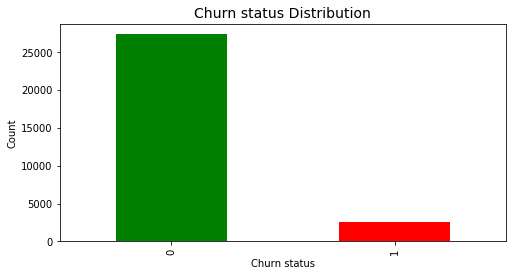

In [25]:
## The below plot shows Churn and Not-Churn bar graph.

plt.figure(figsize=(8,4))
high_value_customer['telecom_churn'].value_counts().plot(kind = 'bar', color = ['green', 'red'])
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)
plt.show() 

Action Phase ==> Customer gets compelling offer from a competitor, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

#### Below displayed some of the important feature plots wrt to the churned out customers.

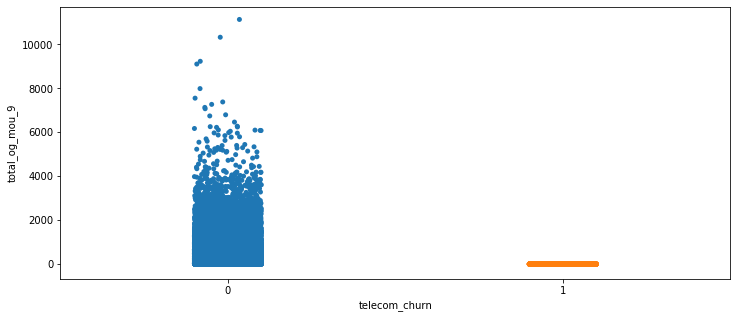

In [26]:
## total_og_mou_9 - Total Outgoing MOU.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='total_og_mou_9', data=high_value_customer) 

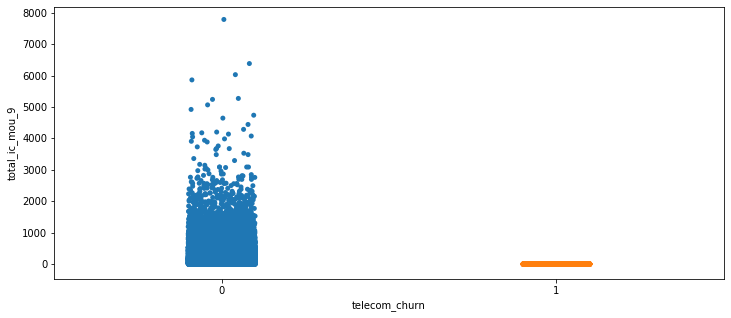

In [27]:
## total_ic_mou_9 - Total Incoming MOU.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='total_ic_mou_9', data=high_value_customer) 

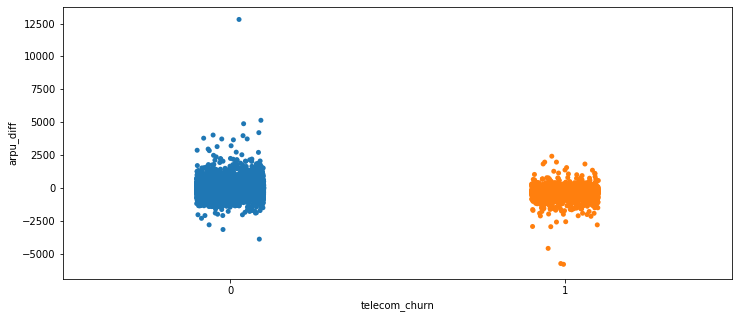

In [28]:
## arpu_diff - Average Revenue / User.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='arpu_diff', data=high_value_customer) 

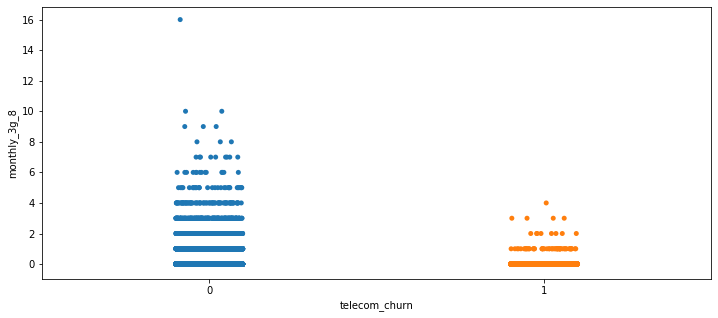

In [29]:
## monthly_3g_8 - Monthly 3g.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='monthly_3g_8', data=high_value_customer) 

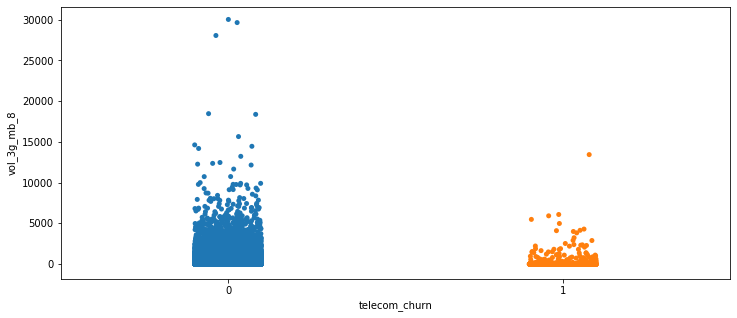

In [30]:
## vol_3g_mb_8 - Volume 3g Internet.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='vol_3g_mb_8', data=high_value_customer) 

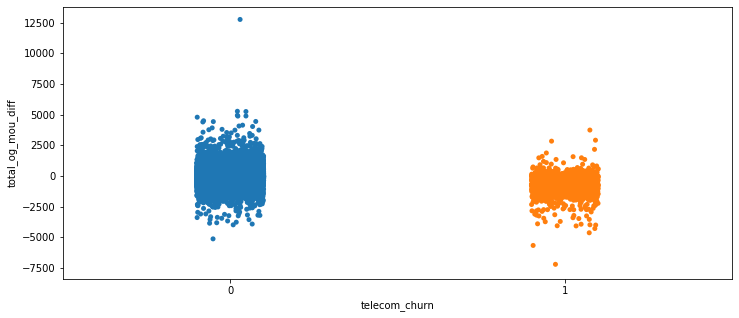

In [31]:
## total_og_mou_diff - Total Outgoing MOU Difference.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='total_og_mou_diff', data=high_value_customer) 

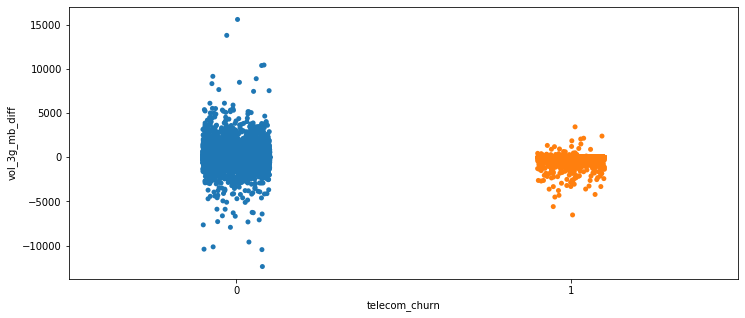

In [32]:
## vol_3g_mb_diff - Volume 3g Internet Difference.
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.stripplot(x='telecom_churn', y='vol_3g_mb_diff', data=high_value_customer) 

#### Drop all the temporary variables created.

In [33]:
## Drop all newly created columns here.

high_value_customer = high_value_customer.drop(['Avg_rech_amt', 'arpu_diff', 'total_og_mou_diff',
                                                 'total_ic_mou_diff', 'vol_3g_mb_diff'], axis=1)
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 180 entries, loc_og_t2o_mou to telecom_churn
dtypes: category(1), float64(145), int64(33), object(1)
memory usage: 41.0+ MB


#### Remove attributes of the churn phase.

In [34]:
## Drop all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
high_value_customer = high_value_customer.drop(high_value_customer.filter(regex='_9|sep', axis = 1).columns, axis=1)
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 134 entries, loc_og_t2o_mou to telecom_churn
dtypes: category(1), float64(108), int64(25)
memory usage: 30.4 MB


### Train-Test Split

Test-Train Split and do Evaluate the models using appropriate evaluation metrics.    
Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation 
metric which reflects this business goal.

In [35]:
# Putting feature variable to X and y.
X = high_value_customer.drop(['telecom_churn'], axis=1) 
y = high_value_customer['telecom_churn']

In [36]:
# Splitting the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
26370,0.00,0.00,0.00,0.00,653.97,985.60,0.00,52.63,53.04,0.00,...,0,0,0,0,0,0,1078,0.00,0.00,0.00
10382,0.00,0.00,0.00,343.64,516.52,160.70,46.49,37.59,17.11,94.78,...,1,1,0,0,0,0,999,137.59,2055.83,38.36
5067,0.00,0.00,0.00,898.59,498.27,518.41,83.06,26.39,11.86,452.59,...,0,0,1,0,0,0,2926,1382.71,707.91,681.19
16438,0.00,0.00,0.00,443.94,687.78,1022.55,205.29,96.49,58.53,255.83,...,0,0,0,0,0,0,1359,0.00,0.00,0.00
10086,0.00,0.00,0.00,472.18,310.18,452.13,4.26,13.56,33.16,1132.39,...,0,0,0,0,0,0,389,0.00,0.00,0.00


In [37]:
print("Training dataset size        ==> ",X_train.shape)
print("Training dataset target size ==> ",y_train.shape)
print("Test dataset size            ==> ",X_test.shape)
print("Test dataset target size     ==> ",y_test.shape)

Training dataset size        ==>  (20985, 133)
Training dataset target size ==>  (20985,)
Test dataset size            ==>  (8994, 133)
Test dataset target size     ==>  (8994,)


### Scaling the Features First.

Scale and standardise the data so that the variables of differing magnitudes fall in the same range.    

In [38]:
# Create a scaling object
scaler = StandardScaler()

## Below is the list of features before scaling.

varlist = [ 'onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8','std_ic_t2f_mou_8', 
'roam_ic_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'ic_others_8', 'og_others_8', 'spl_ic_mou_8', 
'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 'isd_ic_mou_8', 'loc_og_t2c_mou_8', 
'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 
'std_ic_t2o_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'std_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2t_mou_6', 
'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6','std_og_t2t_mou_6', 'spl_og_mou_6',
'loc_og_mou_6', 'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
'loc_og_t2t_mou_6', 'roam_og_mou_6', 'std_ic_t2t_mou_6', 'onnet_mou_6', 'loc_ic_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7',
'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'std_og_t2m_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2f_mou_7', 
'roam_og_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 
'std_ic_mou_7','loc_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'og_others_7', 'spl_og_mou_7', 
'isd_ic_mou_7', 'std_ic_t2o_mou_7', 'std_og_mou_7', 'loc_ic_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2o_mou' ]

#### Scaling the Training Data.

In [39]:
# Scale these variables using 'fit_transform'.
X_train[varlist] = scaler.fit_transform(X_train[varlist])

In [40]:
## Xtrain is the scaled data.
Xtrain = X_train[varlist]
Xtrain.head()

,onnet_mou_8,std_ic_t2t_mou_8,std_ic_mou_8,roam_og_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,roam_ic_mou_8,std_ic_t2o_mou_8,loc_og_t2t_mou_8,isd_og_mou_8,...,loc_ic_mou_7,spl_ic_mou_7,og_others_7,spl_og_mou_7,isd_ic_mou_7,std_ic_t2o_mou_7,std_og_mou_7,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou
26370,-0.46,-0.21,-0.17,-0.20,-0.06,-0.13,-0.17,0.00,-0.21,-0.04,...,-0.65,-0.10,-0.02,-0.10,-0.15,0.00,1.42,0.00,0.00,0.00
10382,-0.54,-0.14,-0.30,-0.20,-0.28,-0.13,-0.17,0.00,-0.30,-0.04,...,-0.55,-0.10,-0.02,-0.32,-0.14,0.00,-0.65,0.00,0.00,0.00
5067,-0.55,-0.21,-0.31,-0.20,-0.27,0.02,-0.17,0.00,-0.32,-0.04,...,0.16,-0.10,-0.02,0.46,0.19,0.00,-0.65,0.00,0.00,0.00
16438,-0.45,-0.16,-0.06,-0.20,0.05,-0.13,-0.17,0.00,-0.19,-0.04,...,-0.02,-0.10,-0.02,-0.23,-0.15,0.00,1.19,0.00,0.00,0.00
10086,-0.51,-0.21,-0.33,-0.20,-0.27,-0.13,-0.17,0.00,-0.36,-0.04,...,-0.59,-0.10,-0.02,-0.32,-0.15,0.00,0.45,0.00,0.00,0.00


#### Scaling the Testing Data.

In [41]:
# Scale these variables using 'transform'.
X_test[varlist] = scaler.transform(X_test[varlist])

In [42]:
## Xtest is the scaled data.
Xtest = X_test[varlist]
Xtest.head()

,onnet_mou_8,std_ic_t2t_mou_8,std_ic_mou_8,roam_og_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,roam_ic_mou_8,std_ic_t2o_mou_8,loc_og_t2t_mou_8,isd_og_mou_8,...,loc_ic_mou_7,spl_ic_mou_7,og_others_7,spl_og_mou_7,isd_ic_mou_7,std_ic_t2o_mou_7,std_og_mou_7,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou
22880,1.52,-0.21,-0.00,-0.20,0.16,-0.13,-0.17,0.00,3.67,-0.04,...,2.16,-0.10,-0.02,0.05,-0.15,0.00,-0.59,0.00,0.00,0.00
21814,-0.25,-0.21,-0.30,-0.20,-0.24,-0.13,-0.17,0.00,0.27,-0.04,...,0.54,-0.10,-0.02,-0.27,-0.15,0.00,-0.65,0.00,0.00,0.00
25755,-0.49,-0.21,-0.12,-0.20,-0.23,1.17,-0.17,0.00,-0.19,-0.04,...,1.89,-0.10,-0.02,-0.32,-0.15,0.00,-0.65,0.00,0.00,0.00
8765,-0.54,-0.18,-0.27,-0.20,-0.21,-0.13,-0.17,0.00,-0.33,-0.04,...,-0.74,-0.10,-0.02,-0.32,0.20,0.00,-0.58,0.00,0.00,0.00
28867,1.70,-0.21,-0.32,13.79,-0.27,-0.13,5.26,0.00,-0.36,-0.04,...,-0.77,-0.10,-0.02,-0.32,-0.15,0.00,-0.66,0.00,0.00,0.00


## MODEL WITHOUT PCA.

#### We will be using LogisticRegression to identify the important predictor attributes which help the business understand indicators of churn.

Below displaying the univariate EDA plots for some of the features.

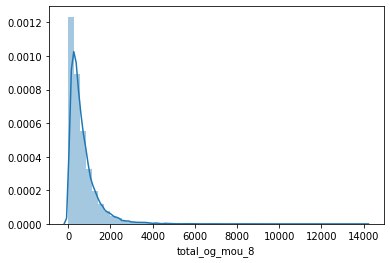

In [43]:
# total_og_mou_8: Total Outgoing Calls

sns.distplot(high_value_customer['total_og_mou_8'])
plt.show()

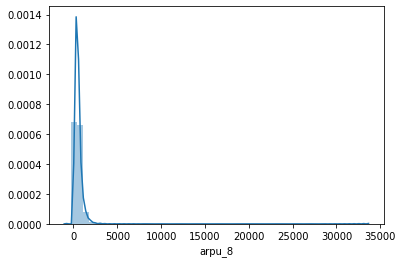

In [44]:
# arpu_8: Average Revenue Per User.

sns.distplot(high_value_customer['arpu_8'])
plt.show()

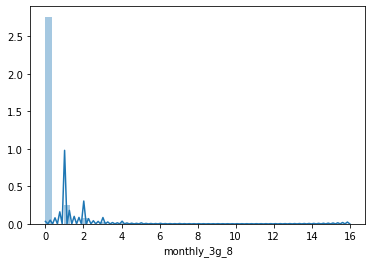

In [45]:
# monthly_3g_8: Monthly 3g usage.

sns.distplot(high_value_customer['monthly_3g_8'])
plt.show()

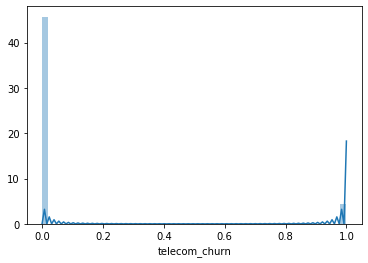

In [46]:
# telecom_churn: telecom churn ratio.

sns.distplot(high_value_customer['telecom_churn'])
plt.show()

#### Handling Multi-collinearity.

In [47]:
# Plot Correlation matrix for 134 features.
cor_telecom1 = high_value_customer.corr()
cor_telecom1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
loc_og_t2o_mou,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std_og_t2o_mou,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
loc_ic_t2o_mou,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
arpu_6,nan,nan,nan,1.00,0.63,0.57,0.29,0.14,0.12,0.46,...,0.22,0.13,0.14,0.05,0.03,0.02,-0.01,0.12,0.12,0.17
arpu_7,nan,nan,nan,0.63,1.00,0.74,0.14,0.27,0.22,0.27,...,0.13,0.24,0.17,0.03,0.06,0.04,-0.02,0.15,0.17,0.11


In [48]:
## Drop columns with Nan values.

high_value_customer = high_value_customer.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)                                                 
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 125 entries, arpu_6 to telecom_churn
dtypes: category(1), float64(99), int64(25)
memory usage: 28.4 MB


In [49]:
# Plot Correlation matrix again.
cor_telecom2 = high_value_customer.corr()
cor_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, arpu_6 to jun_vbc_3g
Columns: 124 entries, arpu_6 to jun_vbc_3g
dtypes: float64(124)
memory usage: 121.1+ KB


After careful observation now we're dropping some correlated & non-significant features which do not contribute much to the business revenue.

In [50]:
high_value_customer = high_value_customer.drop([ 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
'loc_ic_t2t_mou_6', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'aon',
'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1)
                                            
high_value_customer.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,telecom_churn
0,1069.18,1349.85,3171.48,57.84,16.23,33.49,31.64,23.74,12.59,38.06,...,0,0,0,0,0,0,57.74,19.38,18.74,1
1,378.72,492.22,137.36,413.69,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,21.03,910.65,122.16,0
2,492.85,205.67,593.26,501.76,23.53,144.24,72.11,7.98,35.26,1.44,...,0,0,0,0,0,0,0.00,0.00,0.00,0
3,430.98,299.87,187.89,50.51,0.00,2.83,0.00,0.00,17.74,0.00,...,0,0,0,0,0,0,0.00,2.45,21.89,0
4,690.01,18.98,25.50,1185.91,0.00,4.76,4.81,0.00,8.46,13.34,...,0,0,0,0,0,0,0.00,0.00,0.00,0


In [51]:
# Plot Correlation matrix again to check collinearity.
cor_telecom3 = high_value_customer.corr()
cor_telecom3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
arpu_6,1.00,0.63,0.57,0.29,0.11,0.07,0.08,0.18,0.12,0.11,...,-0.02,0.22,0.13,0.14,0.05,0.03,0.02,0.12,0.12,0.17
arpu_7,0.63,1.00,0.74,0.14,0.07,0.08,0.08,0.11,0.16,0.14,...,-0.01,0.13,0.24,0.17,0.03,0.06,0.04,0.15,0.17,0.11
arpu_8,0.57,0.74,1.00,0.09,0.07,0.06,0.10,0.11,0.12,0.19,...,0.02,0.13,0.16,0.25,0.02,0.04,0.08,0.19,0.14,0.12
onnet_mou_6,0.29,0.14,0.09,1.00,0.01,0.01,0.03,0.05,0.06,0.06,...,-0.03,-0.08,-0.08,-0.07,-0.03,-0.02,-0.03,-0.09,-0.09,-0.08
roam_ic_mou_6,0.11,0.07,0.07,0.01,1.00,0.50,0.36,0.64,0.36,0.23,...,-0.00,0.01,0.01,0.01,-0.01,-0.01,-0.01,0.02,0.01,0.02


From the above we see there is less collinearity between features. We can build models now.

#### Logistic regression model.

In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(Xtrain)), family=sm.families.Binomial()) 
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          telecom_churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20911
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4292.4
Date:                Fri, 10 Apr 2020   Deviance:                       8584.9
Time:                        20:03:11   Pearson chi2:                 9.04e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8916      0.076    -50.898      0.000      -4.041      -3.742
onnet_mou_8          0.5469      0.400      1.367      0.172      -0.237       1.331
std_ic_t2t_mou_8  2846.9638    570.320      4.992      0.000    1729.156    3964.771
std_ic_mou_8     -5669.3120   1135.506     -4.993      0.000   -7894.864   -3443.761
roam_og_mou_8       -0.1078      0.056     -1.915      0.055      -0.218       0.003
std_ic_t2m_mou_8  4285.6155    858.434      4.992      0.000    2603.116    5968.115
std_ic_t2f_mou_8   790.8151    158.460      4.991      0.000     480.239    1101.391
roam_ic_mou_8       -0.1028      0.038     -2.722      0.006      -0.177      -0.029
std_ic_t2o_mou_8   6.44e-07   1.49e-07      4.311      0.000    3.51e-07    9.37e-07
loc_og_t2t_mou_8     0.2560      0.343      0.747      0.455      -0.416       0.928
isd_og_mou_8        -0.4189      0.161     -2.608      0.009      -0.734      -0.104
ic_others_8          0.0575      0.076      0.757      0.449      -0.091       0.207
og_others_8         -1.2296      1.199     -1.025      0.305      -3.581       1.121
spl_ic_mou_8        -0.6793      0.098     -6.923      0.000      -0.872      -0.487
loc_og_t2f_mou_8    -0.0750      0.111     -0.678      0.498      -0.292       0.142
std_og_t2m_mou_8  1.624e+04   3163.837      5.134      0.000       1e+04    2.24e+04
spl_og_mou_8        -0.4958      0.102     -4.875      0.000      -0.695      -0.296
std_og_t2c_mou_8 -1.821e-07   6.09e-08     -2.991      0.003   -3.01e-07   -6.28e-08
isd_ic_mou_8        -0.5087      0.127     -4.003      0.000      -0.758      -0.260
loc_og_t2c_mou_8     0.1303      0.060      2.186      0.029       0.013       0.247
std_og_t2f_mou_8   441.5425     86.020      5.133      0.000     272.945     610.139
std_og_t2t_mou_8  1.574e+04   3065.033      5.134      0.000    9729.147    2.17e+04
loc_og_mou_8        -2.9733      0.203    -14.668      0.000      -3.371      -2.576
std_og_mou_8     -2.381e+04   4637.537     -5.135      0.000   -3.29e+04   -1.47e+04
std_ic_t2f_mou_6  -491.1959    117.508     -4.180      0.000    -721.508    -260.884
std_ic_t2m_mou_6 -2491.0004    595.974     -4.180      0.000   -3659.089   -1322.912
std_ic_t2o_mou_6  1.151e-06   2.27e-07      5.079      0.000    7.07e-07     1.6e-06
ic_others_6          0.0108      0.065      0.165      0.869      -0.118       0.139
isd_ic_mou_6         0.0427      0.052      0.828      0.408      -0.058       0.144
spl_ic_mou_6         0.0694      0.029      2.377      0.017       0.012       0.127
std_ic_mou_6      3408.4860    815.449      4.180      0.000    1810.236    5006.736
loc_ic_t2f_mou_6   571.8044    232.468      2.460      0.014     116.175    1027.433
loc_ic_t2t_mou_6  1976.9682    803.689      2.460      0.014     401.766    3552.170
std_og_t2c_mou_6  1.274

### Feature Selection Using RFE.

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # Running RFE with 15 variables as output.
rfe = rfe.fit(Xtrain, y_train)

In [55]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False])

In [56]:
list(zip(Xtrain.columns, rfe.support_, rfe.ranking_))

## RFE Selected Variable List.
col = Xtrain.columns[rfe.support_]

In [57]:
Xtrain.columns[~rfe.support_]

Index(['onnet_mou_8', 'std_ic_t2t_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8',
       'roam_ic_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'ic_others_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2c_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6',
       'ic_others_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2t_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'loc_og_mou_6',
       'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_og_mou_6',
       'std_ic_t2t_mou_6', 'onnet_mou_6', 'loc_ic_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_7',
       'roam_ic_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7',
       'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7',
       'std_og_t2m_mou_7', 'loc

### Assessing the model with StatsModels.

In [58]:
Xtrain_sm1 = sm.add_constant(Xtrain[col])
logm2 = sm.GLM(y_train, Xtrain_sm1, family = sm.families.Binomial())  
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          telecom_churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4488.0
Date:                Fri, 10 Apr 2020   Deviance:                       8975.9
Time:                        20:04:22   Pearson chi2:                 1.53e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0119      0.080    -50.212      0.000      -4.169      -3.855
std_ic_mou_8        -0.6396      0.104     -6.138      0.000      -0.844      -0.435
std_ic_t2f_mou_8    -0.3595      0.157     -2.296      0.022      -0.666      -0.053
isd_og_mou_8        -0.4625      0.162     -2.852      0.004      -0.780      -0.145
og_others_8         -1.3259      1.217     -1.089      0.276      -3.712       1.060
spl_ic_mou_8        -0.6889      0.095     -7.227      0.000      -0.876      -0.502
spl_og_mou_8        -0.3617      0.073     -4.967      0.000      -0.504      -0.219
isd_ic_mou_8        -0.5330      0.130     -4.098      0.000      -0.788      -0.278
loc_og_mou_8        -3.2221      0.136    -23.712      0.000      -3.488      -2.956
std_og_mou_8        -1.1233      0.066    -16.900      0.000      -1.254      -0.993
std_ic_mou_6         0.2027      0.035      5.730      0.000       0.133       0.272
std_og_mou_6         0.3206      0.032      9.918      0.000       0.257       0.384
isd_og_mou_6         0.3918      0.092      4.246      0.000       0.211       0.573
loc_og_mou_7         0.5823      0.061      9.544      0.000       0.463       0.702
isd_ic_mou_7         0.2083      0.056      3.742      0.000       0.099       0.317
std_og_mou_7         0.2954      0.043      6.863      0.000       0.211       0.380
====================================================================================
"""

In [59]:
# Getting the predicted values on the train set
y_train_pred = res.predict(Xtrain_sm1)
y_train_pred[:10]

26370   0.00
10382   0.11
5067    0.06
16438   0.00
10086   0.07
7679    0.02
13248   0.27
24371   0.00
6262    0.05
1424    0.25
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.29892684e-03, 1.09273261e-01, 6.46968615e-02, 2.37584354e-03,
       7.37777693e-02, 1.87142721e-02, 2.68861758e-01, 1.63472119e-04,
       4.64832925e-02, 2.52570226e-01])

#### Creating a dataframe with the actual churn flag & predicted probabilities.

In [61]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

Creating new column 'predicted' with 1 if Churn_Prob > 0.08 else 0

In [62]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.08 else 0)  

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.00,0
1,0,0.11,1
2,0,0.06,0
3,0,0.00,0
4,0,0.07,0


In [63]:
from sklearn import metrics

In [64]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[14020  5191]
 [  284  1490]]


#### Calculating Accuracy 1

In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)

73.90993566833453


#### Finding VIF 1st Time.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contain the names of all feature variables and their respective VIFs.

vif1 = pd.DataFrame()
vif1['Features'] = Xtrain[col].columns
vif1['VIF'] = [variance_inflation_factor(Xtrain[col].values, i) for i in range(Xtrain[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)

vif1

,Features,VIF
2,isd_og_mou_8,6.62
11,isd_og_mou_6,6.62
14,std_og_mou_7,3.49
7,loc_og_mou_8,3.17
12,loc_og_mou_7,3.16
8,std_og_mou_8,2.64
6,isd_ic_mou_8,2.08
13,isd_ic_mou_7,2.08
10,std_og_mou_6,2.04
0,std_ic_mou_8,1.77


In [68]:
# Removing features with High VIF Values - isd_og_mou_8 - 6.62
col1 = col.drop('isd_og_mou_8', 1)
col1

Index(['std_ic_mou_8', 'std_ic_t2f_mou_8', 'og_others_8', 'spl_ic_mou_8',
       'spl_og_mou_8', 'isd_ic_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'std_ic_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'loc_og_mou_7',
       'isd_ic_mou_7', 'std_og_mou_7'],
      dtype='object')

In [69]:
# Let's re-run the model using the selected variables
Xtrain_sm2 = sm.add_constant(Xtrain[col1])
logm3 = sm.GLM(y_train, Xtrain_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          telecom_churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4501.3
Date:                Fri, 10 Apr 2020   Deviance:                       9002.7
Time:                        20:04:23   Pearson chi2:                 1.80e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0193      0.080    -50.117      0.000      -4.176      -3.862
std_ic_mou_8        -0.6482      0.104     -6.207      0.000      -0.853      -0.444
std_ic_t2f_mou_8    -0.3602      0.156     -2.304      0.021      -0.667      -0.054
og_others_8         -1.3342      1.219     -1.094      0.274      -3.724       1.056
spl_ic_mou_8        -0.6986      0.097     -7.233      0.000      -0.888      -0.509
spl_og_mou_8        -0.3661      0.073     -5.016      0.000      -0.509      -0.223
isd_ic_mou_8        -0.5678      0.130     -4.366      0.000      -0.823      -0.313
loc_og_mou_8        -3.2410      0.136    -23.818      0.000      -3.508      -2.974
std_og_mou_8        -1.1220      0.066    -16.888      0.000      -1.252      -0.992
std_ic_mou_6         0.2082      0.035      5.880      0.000       0.139       0.278
std_og_mou_6         0.3175      0.032      9.828      0.000       0.254       0.381
isd_og_mou_6         0.0299      0.016      1.831      0.067      -0.002       0.062
loc_og_mou_7         0.5827      0.061      9.547      0.000       0.463       0.702
isd_ic_mou_7         0.2203      0.055      3.972      0.000       0.112       0.329
std_og_mou_7         0.2931      0.043      6.811      0.000       0.209       0.377
====================================================================================
"""

In [70]:
y_train_pred = res.predict(Xtrain_sm2).values.reshape(-1)

In [71]:
y_train_pred[:10]

array([3.32495742e-03, 1.10158879e-01, 6.50407376e-02, 2.39077064e-03,
       7.43386240e-02, 1.85355623e-02, 2.72990254e-01, 1.57681212e-04,
       4.55841965e-02, 2.55611146e-01])

In [72]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.08 else 0)

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[13988  5223]
 [  283  1491]]


#### Calculating Accuracy 2

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)

73.76221110316892


Overall Accuracy did not changed much.

#### Finding VIF 2nd Time

In [76]:
# Create a dataframe that will contain the names of all feature variables and their respective VIFs.

vif2 = pd.DataFrame()
vif2['Features'] = Xtrain[col1].columns
vif2['VIF'] = [variance_inflation_factor(Xtrain[col1].values, i) for i in range(Xtrain[col1].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)

vif2

,Features,VIF
13,std_og_mou_7,3.49
6,loc_og_mou_8,3.17
11,loc_og_mou_7,3.16
7,std_og_mou_8,2.64
5,isd_ic_mou_8,2.08
12,isd_ic_mou_7,2.08
9,std_og_mou_6,2.04
0,std_ic_mou_8,1.77
8,std_ic_mou_6,1.72
1,std_ic_t2f_mou_8,1.06


In [77]:
### Dropping another HIGH VIF feature. 
col2 = col1.drop('std_og_mou_7', 1)
col2

Index(['std_ic_mou_8', 'std_ic_t2f_mou_8', 'og_others_8', 'spl_ic_mou_8',
       'spl_og_mou_8', 'isd_ic_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'std_ic_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'loc_og_mou_7',
       'isd_ic_mou_7'],
      dtype='object')

In [78]:
# Let's re-run the model using the selected variables.

Xtrain_sm3 = sm.add_constant(Xtrain[col2])
logm4 = sm.GLM(y_train, Xtrain_sm3, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          telecom_churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4524.1
Date:                Fri, 10 Apr 2020   Deviance:                       9048.2
Time:                        20:04:24   Pearson chi2:                 2.76e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0320      0.080    -50.232      0.000      -4.189      -3.875
std_ic_mou_8        -0.6390      0.104     -6.163      0.000      -0.842      -0.436
std_ic_t2f_mou_8    -0.3675      0.156     -2.353      0.019      -0.674      -0.061
og_others_8         -1.2856      1.197     -1.074      0.283      -3.631       1.060
spl_ic_mou_8        -0.7184      0.097     -7.423      0.000      -0.908      -0.529
spl_og_mou_8        -0.3583      0.072     -4.952      0.000      -0.500      -0.217
isd_ic_mou_8        -0.5868      0.131     -4.496      0.000      -0.843      -0.331
loc_og_mou_8        -3.3581      0.136    -24.664      0.000      -3.625      -3.091
std_og_mou_8        -0.9177      0.057    -16.063      0.000      -1.030      -0.806
std_ic_mou_6         0.2023      0.035      5.755      0.000       0.133       0.271
std_og_mou_6         0.4284      0.028     15.224      0.000       0.373       0.484
isd_og_mou_6         0.0293      0.016      1.798      0.072      -0.003       0.061
loc_og_mou_7         0.6300      0.060     10.446      0.000       0.512       0.748
isd_ic_mou_7         0.2292      0.056      4.119      0.000       0.120       0.338
====================================================================================
"""

In [79]:
y_train_pred = res.predict(Xtrain_sm3).values.reshape(-1)

In [80]:
y_train_pred[:10]

array([3.97869399e-03, 1.12473799e-01, 6.68405626e-02, 3.28758087e-03,
       9.59609510e-02, 1.88634108e-02, 2.84422800e-01, 1.84808991e-04,
       4.55661557e-02, 2.65659321e-01])

In [81]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

In [82]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.08 else 0) 

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[13870  5341]
 [  285  1489]]


In [84]:
# Let's check the overall training accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)

73.19037407672147


Overall Accuracy did not drop much again here.

#### Finding VIF 3rd Time.

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif3 = pd.DataFrame()
vif3['Features'] = Xtrain[col2].columns
vif3['VIF'] = [variance_inflation_factor(Xtrain[col2].values, i) for i in range(Xtrain[col2].shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)

vif3

,Features,VIF
11,loc_og_mou_7,3.15
6,loc_og_mou_8,3.14
5,isd_ic_mou_8,2.08
12,isd_ic_mou_7,2.08
0,std_ic_mou_8,1.76
8,std_ic_mou_6,1.72
7,std_og_mou_8,1.53
9,std_og_mou_6,1.53
1,std_ic_t2f_mou_8,1.06
4,spl_og_mou_8,1.03


Here we drop 'og_others_8' because it has high p-value.

In [86]:
col3 = col2.drop('og_others_8', 1)
col3

Index(['std_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'spl_og_mou_8',
       'isd_ic_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'std_ic_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'loc_og_mou_7', 'isd_ic_mou_7'],
      dtype='object')

#### Finding VIF 4th Time.

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif4 = pd.DataFrame()
vif4['Features'] = Xtrain[col3].columns
vif4['VIF'] = [variance_inflation_factor(Xtrain[col3].values, i) for i in range(Xtrain[col3].shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)

vif4

,Features,VIF
10,loc_og_mou_7,3.15
5,loc_og_mou_8,3.14
4,isd_ic_mou_8,2.08
11,isd_ic_mou_7,2.08
0,std_ic_mou_8,1.76
7,std_ic_mou_6,1.72
6,std_og_mou_8,1.53
8,std_og_mou_6,1.53
1,std_ic_t2f_mou_8,1.06
3,spl_og_mou_8,1.03


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

### Important Metrics for Model Evaluation. 

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

It is more important to identify churners than the non-churners accurately.

In [89]:
# Let's see the sensitivity/Recall.
print(round(TP/float(TP + FN)*100))

84.0


In [90]:
# Let us calculate Specificity.
print(round(TN/float(TN + FP)*100))

72.0


## Making predictions on the test set.

In [91]:
Xtest_sm = sm.add_constant(Xtest[col]) 

logm5 = sm.GLM(y_test, Xtest_sm, family=sm.families.Binomial())  
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          telecom_churn   No. Observations:                 8994
Model:                            GLM   Df Residuals:                     8978
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.8
Date:                Fri, 10 Apr 2020   Deviance:                       4117.6
Time:                        20:04:25   Pearson chi2:                 1.24e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8728      0.107    -36.033      0.000      -4.083      -3.662
std_ic_mou_8        -1.2180      0.213     -5.708      0.000      -1.636      -0.800
std_ic_t2f_mou_8    -0.4487      0.288     -1.560      0.119      -1.013       0.115
isd_og_mou_8         0.0902      0.179      0.504      0.614      -0.260       0.441
og_others_8          0.0151      0.008      1.983      0.047       0.000       0.030
spl_ic_mou_8        -0.1513      0.056     -2.695      0.007      -0.261      -0.041
spl_og_mou_8        -0.2119      0.087     -2.442      0.015      -0.382      -0.042
isd_ic_mou_8        -0.1356      0.099     -1.364      0.173      -0.330       0.059
loc_og_mou_8        -3.2463      0.209    -15.539      0.000      -3.656      -2.837
std_og_mou_8        -0.9339      0.088    -10.561      0.000      -1.107      -0.761
std_ic_mou_6         0.1224      0.050      2.460      0.014       0.025       0.220
std_og_mou_6         0.2680      0.049      5.429      0.000       0.171       0.365
isd_og_mou_6         0.1722      0.174      0.991      0.322      -0.168       0.513
loc_og_mou_7         0.4878      0.106      4.622      0.000       0.281       0.695
isd_ic_mou_7         0.1282      0.074      1.740      0.082      -0.016       0.273
std_og_mou_7         0.3595      0.064      5.630      0.000       0.234       0.485
====================================================================================
"""

In [92]:
# Getting the predicted values on the test set.
y_test_pred = res.predict(Xtest_sm)
y_test_pred[:10]

22880   0.00
21814   0.00
25755   0.05
8765    0.05
28867   0.21
5103    0.07
23479   0.16
24418   0.32
16942   0.02
2923    0.07
dtype: float64

In [93]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([4.77399756e-07, 9.10354611e-04, 4.82631921e-02, 5.26421599e-02,
       2.08557070e-01, 7.30685070e-02, 1.58676485e-01, 3.20305683e-01,
       1.85694189e-02, 7.00555884e-02])

#### Creating a dataframe with the actual churn flag and the predicted probabilities.

In [94]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})

Creating new column 'predicted' with 1 if Churn_Prob > 0.08 else 0.

In [95]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.08 else 0) 
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.00,0
1,0,0.00,0
2,0,0.05,0
3,0,0.05,0
4,0,0.21,1


In [96]:
# Confusion matrix for test dataset.
confusion_test = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(confusion_test)

[[5666 2513]
 [ 114  701]]


#### Let's check the overall TEST accuracy.

In [97]:
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)*100)

70.79163887035801


In [98]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [99]:
# Let's see the Sensitivity/Recall.
print(round(TP/float(TP+FN)*100))

86.0


In [100]:
# Let us calculate specificity  --> Non-Churned Percentage.
print(round(TN/float(TN+FP)*100))

69.0


### Plotting some of the best Indicators derived.

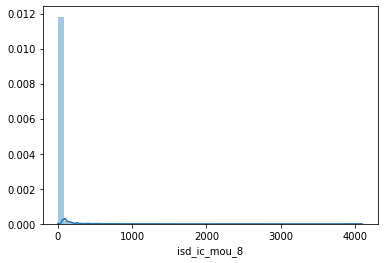

In [101]:
# isd_ic_mou_8: ISD Incoming Minutes of Usage.

sns.distplot(high_value_customer['isd_ic_mou_8'])
plt.show()  

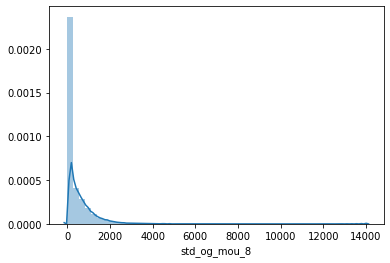

In [102]:
# std_og_mou_8: STD Outgoing Minutes of Usage.

sns.distplot(high_value_customer['std_og_mou_8'])
plt.show()  

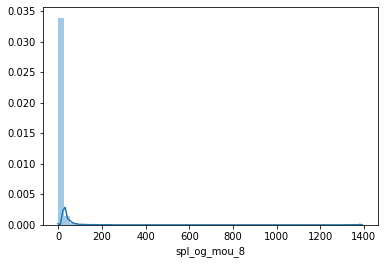

In [103]:
# spl_og_mou_8: Special Outgoing Minutes of Usage.

sns.distplot(high_value_customer['spl_og_mou_8'])
plt.show()  

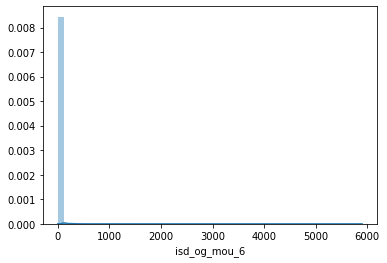

In [104]:
# isd_og_mou_6: ISD Outgoing Minutes of Usage.

sns.distplot(high_value_customer['isd_og_mou_6'])
plt.show()  

#### Picking top 10 features we got from the vif4.

In [105]:
### Top 10 features.
top_10 = vif4.Features[1:10]
top_10

5         loc_og_mou_8
4         isd_ic_mou_8
11        isd_ic_mou_7
0         std_ic_mou_8
7         std_ic_mou_6
6         std_og_mou_8
8         std_og_mou_6
1     std_ic_t2f_mou_8
3         spl_og_mou_8
Name: Features, dtype: object

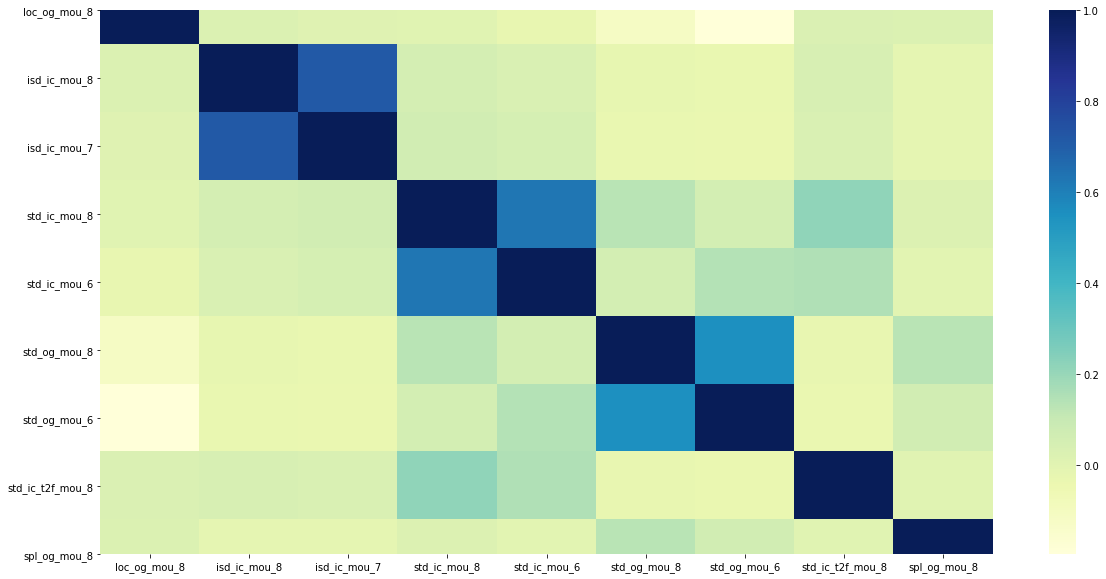

In [106]:
# Plot Heatmap and then validate.

plt.rcParams["figure.figsize"] =(20,10)
mycmap = sns.diverging_palette(100, 200, as_cmap=True)
sns.heatmap(data=Xtrain[top_10].corr(), cmap='YlGnBu') 

### Conclusion 1

From the above it is evident that features like local outgoing, STD incoming/outgoing, ISD incoming/outgoing, special calls incoming/outgoing are very important features.

### Finding out Features using RandomForest.

There could be more features which can be potentially responsible for the customers churn out.    
We will try finding out more important features using other methods like Random Forest.

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Apply Random forest model on training data.
max_features = int(round(np.sqrt(Xtrain.shape[1]))) 
print(max_features)

telecom_rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features)

9


In [108]:
## Fit the Model first.
telecom_rf_model.fit(Xtrain,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
# Here we find the top features which are important in customer retention and new business aquisition.

telecom_var = high_value_customer.drop(['telecom_churn','arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
                                        'total_rech_num_6', 'total_rech_num_7'], axis=1).columns

# Telecom Feature_importance.
importance = telecom_rf_model.feature_importances_

# Creating the new dataframe.
telecom_indicators = pd.DataFrame({'Variables': telecom_var, 'Significance%': importance*100}).sort_values('Significance%', ascending=False)

telecom_indicators

,Variables,Significance%
21,spl_og_mou_6,9.11
8,std_og_t2t_mou_8,6.32
0,roam_ic_mou_6,4.66
2,roam_ic_mou_8,3.53
6,std_og_t2t_mou_6,2.62
...,...,...
77,sachet_3g_7,0.00
32,std_ic_t2t_mou_8,0.00
79,aug_vbc_3g,0.00
80,jul_vbc_3g,0.00


In [110]:
# Getting the top 25 features.
top_25 = telecom_indicators.Variables[1:25]
top_25.head()

8    std_og_t2t_mou_8
0       roam_ic_mou_6
2       roam_ic_mou_8
6    std_og_t2t_mou_6
3       roam_og_mou_6
Name: Variables, dtype: object

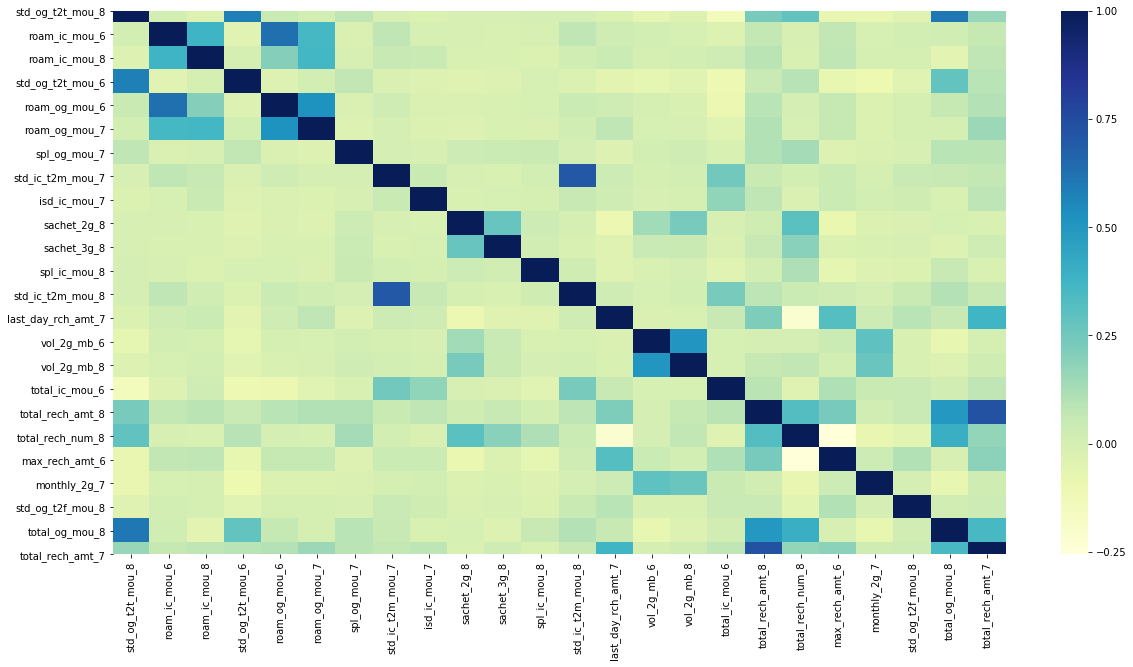

In [111]:
# Plot Feature correlation and then validate.

plt.rcParams["figure.figsize"] =(20,10)
mycmap = sns.diverging_palette(100, 200, as_cmap=True)
sns.heatmap(data=X_train[top_25].corr(), cmap='YlGnBu') 

### Conclusion 2

1) From the above it is evident that features like roaming charges, special incoming/outgoing charges, monthly 2g, sachet 3g package charges, STD/ISD charges are very important for the customer rentention.

## Business Recommendations.

### Taking both Conclusion 1 and Conclusion 2 into consideration, we have the following items as the business recommendation.   
1) From the above it is evident that features like roaming charges, STD/ISD charges, monthly sachet 2g/3g data are very crucial.    
2) Telecom companies also have to pay attention to internet charges and offer better package to customers to retain them.    
3) Check out-going charges especially for ISD calls, it might need call rate revision.   
4) Offer customers standard monthly/quaterly packages.     
5) Telecom companies can come up with new ideas like 'if today is customer's birthday' then he/she will get a voucher on buying a service.    
6) Providing good Customer Service will also play a vital role in retaining the customer.    

## PCA - Principal Component Analysis.

In [112]:
# Using PCA for decomposition.
from sklearn.decomposition import PCA
pca_final = PCA(random_state=100)

In [113]:
telecom_train_pca = pca_final.fit_transform(Xtrain)
telecom_train_pca.shape

(20985, 82)

In [114]:
pca_final.components_

array([[-0.09377092, -0.04203103, -0.04151529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27051554,  0.12637795,  0.16118197, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17053142,  0.18722581,  0.31587895, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [115]:
pca_final.explained_variance_

array([7.95970895e+00, 6.20280025e+00, 5.35741540e+00, 3.56710419e+00,
       3.22996042e+00, 3.04767592e+00, 2.84262618e+00, 2.73885567e+00,
       2.68316452e+00, 2.38457420e+00, 2.10010693e+00, 1.97294664e+00,
       1.84127174e+00, 1.73559536e+00, 1.70155016e+00, 1.59949785e+00,
       1.49722646e+00, 1.26479075e+00, 1.19633929e+00, 1.02346767e+00,
       9.84770758e-01, 9.77566058e-01, 9.46444797e-01, 8.98625374e-01,
       8.01938931e-01, 7.95580329e-01, 7.66137740e-01, 7.36131772e-01,
       7.18256590e-01, 6.27580802e-01, 6.16648520e-01, 5.65401287e-01,
       5.14386326e-01, 4.86958662e-01, 4.54657211e-01, 4.48152845e-01,
       3.93838002e-01, 3.93059618e-01, 3.73641213e-01, 3.48545741e-01,
       3.39523501e-01, 3.16523764e-01, 3.03903737e-01, 2.93603809e-01,
       2.75024316e-01, 2.60534790e-01, 2.51860040e-01, 2.47594642e-01,
       2.38137002e-01, 2.26471392e-01, 2.14474428e-01, 2.09693170e-01,
       1.92312311e-01, 1.87373278e-01, 1.71688916e-01, 1.64454525e-01,
      

In [116]:
pca_final.explained_variance_ratio_

array([1.09031913e-01, 8.49658174e-02, 7.33857549e-02, 4.88621124e-02,
       4.42439246e-02, 4.17469957e-02, 3.89382290e-02, 3.75167829e-02,
       3.67539268e-02, 3.26638434e-02, 2.87672172e-02, 2.70253784e-02,
       2.52216986e-02, 2.37741460e-02, 2.33077956e-02, 2.19098853e-02,
       2.05089741e-02, 1.73250750e-02, 1.63874285e-02, 1.40194369e-02,
       1.34893675e-02, 1.33906777e-02, 1.29643794e-02, 1.23093500e-02,
       1.09849413e-02, 1.08978413e-02, 1.04945374e-02, 1.00835163e-02,
       9.83866250e-03, 8.59658761e-03, 8.44683746e-03, 7.74485402e-03,
       7.04605225e-03, 6.67034872e-03, 6.22788418e-03, 6.13878752e-03,
       5.39478404e-03, 5.38412175e-03, 5.11812887e-03, 4.77437167e-03,
       4.65078523e-03, 4.33573535e-03, 4.16286651e-03, 4.02177833e-03,
       3.76727685e-03, 3.56879966e-03, 3.44997313e-03, 3.39154580e-03,
       3.26199526e-03, 3.10220000e-03, 2.93786586e-03, 2.87237229e-03,
       2.63428969e-03, 2.56663492e-03, 2.35179088e-03, 2.25269436e-03,
      

In [117]:
print("pca_final.explained_variance_ratio_: ", pca_final.explained_variance_ratio_.round(3)*100)

pca_final.explained_variance_ratio_:  [10.9  8.5  7.3  4.9  4.4  4.2  3.9  3.8  3.7  3.3  2.9  2.7  2.5  2.4
  2.3  2.2  2.1  1.7  1.6  1.4  1.3  1.3  1.3  1.2  1.1  1.1  1.   1.
  1.   0.9  0.8  0.8  0.7  0.7  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.4
  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2
  0.2  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


<BarContainer object of 82 artists>

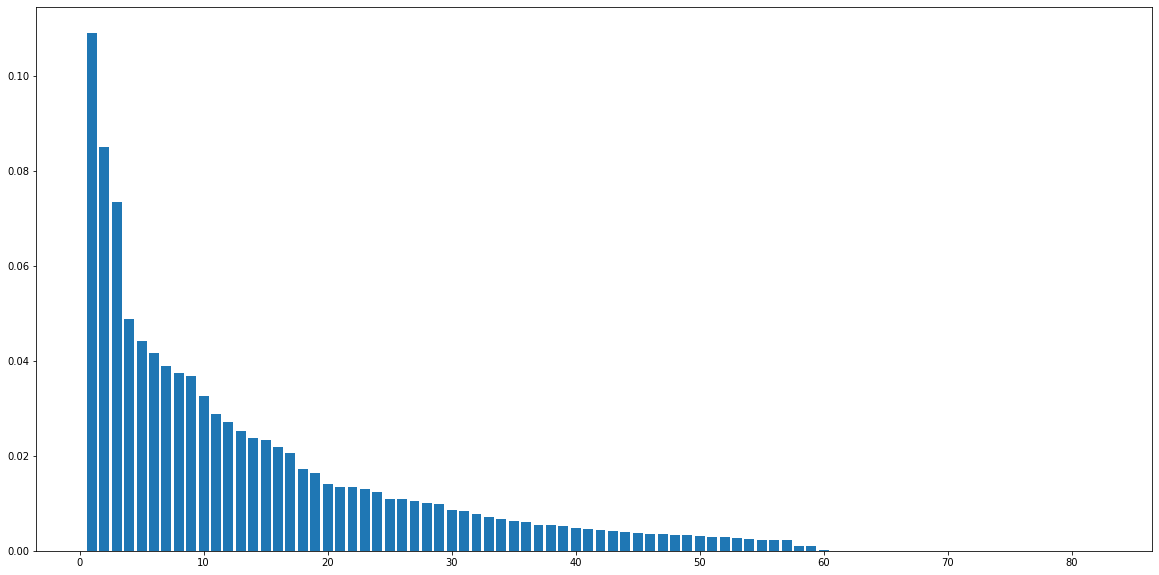

In [118]:
plt.bar(range(1,len(pca_final.explained_variance_ratio_)+1), pca_final.explained_variance_ratio_)

In [119]:
print(pca_final.explained_variance_ratio_.cumsum())

[0.10903191 0.19399773 0.26738349 0.3162456  0.36048952 0.40223652
 0.44117475 0.47869153 0.51544546 0.5481093  0.57687652 0.6039019
 0.62912359 0.65289774 0.67620554 0.69811542 0.7186244  0.73594947
 0.7523369  0.76635634 0.7798457  0.79323638 0.80620076 0.81851011
 0.82949505 0.84039289 0.85088743 0.86097095 0.87080961 0.8794062
 0.88785303 0.89559789 0.90264394 0.90931429 0.91554217 0.92168096
 0.92707575 0.93245987 0.937578   0.94235237 0.94700315 0.95133889
 0.95550175 0.95952353 0.96329081 0.96685961 0.97030958 0.97370113
 0.97696312 0.98006532 0.98300319 0.98587556 0.98850985 0.99107649
 0.99342828 0.99568097 0.99786188 0.99892037 0.99986874 0.99995254
 0.99998622 0.99999823 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [120]:
np.cumsum(np.round(pca_final.explained_variance_ratio_, decimals=4)*100)

array([ 10.9 ,  19.4 ,  26.74,  31.63,  36.05,  40.22,  44.11,  47.86,
        51.54,  54.81,  57.69,  60.39,  62.91,  65.29,  67.62,  69.81,
        71.86,  73.59,  75.23,  76.63,  77.98,  79.32,  80.62,  81.85,
        82.95,  84.04,  85.09,  86.1 ,  87.08,  87.94,  88.78,  89.55,
        90.25,  90.92,  91.54,  92.15,  92.69,  93.23,  93.74,  94.22,
        94.69,  95.12,  95.54,  95.94,  96.32,  96.68,  97.02,  97.36,
        97.69,  98.  ,  98.29,  98.58,  98.84,  99.1 ,  99.34,  99.57,
        99.79,  99.9 ,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  ])

#### Screeplot - plotting the cumulative variance against the number of components.

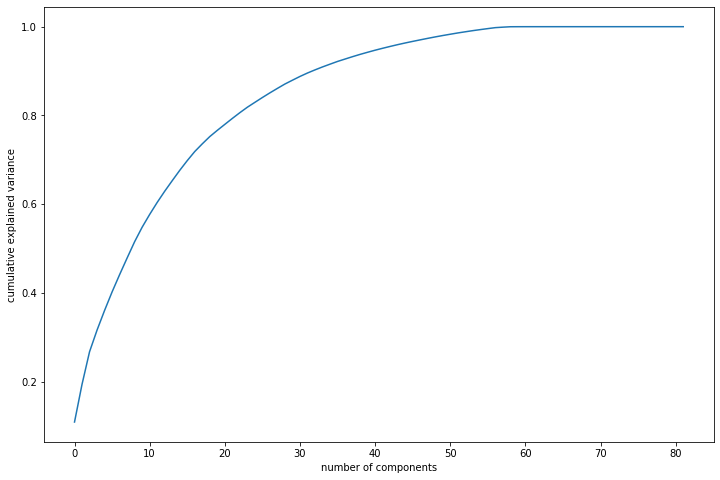

In [121]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above scree plot we need 32 components to explain about 90% of the variance in the data.

In [122]:
pca_final_1 = PCA(n_components=32)

In [123]:
telecom_train_pca1 = pca_final_1.fit_transform(Xtrain)
telecom_train_pca1

array([[-3.13512372, -0.76733959, -0.1874868 , ...,  3.45113756,
         0.04650127,  1.47162117],
       [ 0.06490167, -2.49509076, -0.10986689, ...,  0.03997558,
         0.07588202, -0.01485661],
       [ 2.18573346, -1.11450355, -0.05297065, ...,  0.33579189,
         0.17786545, -0.0705167 ],
       ...,
       [-3.61963414,  2.09369854, -0.19012998, ..., -0.85153384,
         0.39800683, -0.23367858],
       [-0.26579828, -1.55352862,  2.04695978, ...,  0.20377372,
        -0.08307673, -0.29873267],
       [ 0.50778553, -1.04801409,  1.73144293, ..., -0.06335264,
         0.34119312, -0.29202562]])

In [124]:
# Creating correlation matrix for the principal components of PCA.
telecom_corr = np.corrcoef(telecom_train_pca1.transpose())
telecom_corr

array([[ 1.00000000e+00,  1.72713957e-16,  1.91649475e-16, ...,
        -4.89761964e-18, -5.96326032e-18, -8.31050726e-18],
       [ 1.72713957e-16,  1.00000000e+00,  2.81949679e-16, ...,
        -1.23623685e-17,  1.02194111e-17,  8.14688150e-19],
       [ 1.91649475e-16,  2.81949679e-16,  1.00000000e+00, ...,
        -1.47800333e-18,  7.45504185e-19, -3.11684428e-18],
       ...,
       [-4.89761964e-18, -1.23623685e-17, -1.47800333e-18, ...,
         1.00000000e+00,  5.17005460e-16,  1.57160364e-16],
       [-5.96326032e-18,  1.02194111e-17,  7.45504185e-19, ...,
         5.17005460e-16,  1.00000000e+00, -2.97555768e-16],
       [-8.31050726e-18,  8.14688150e-19, -3.11684428e-18, ...,
         1.57160364e-16, -2.97555768e-16,  1.00000000e+00]])

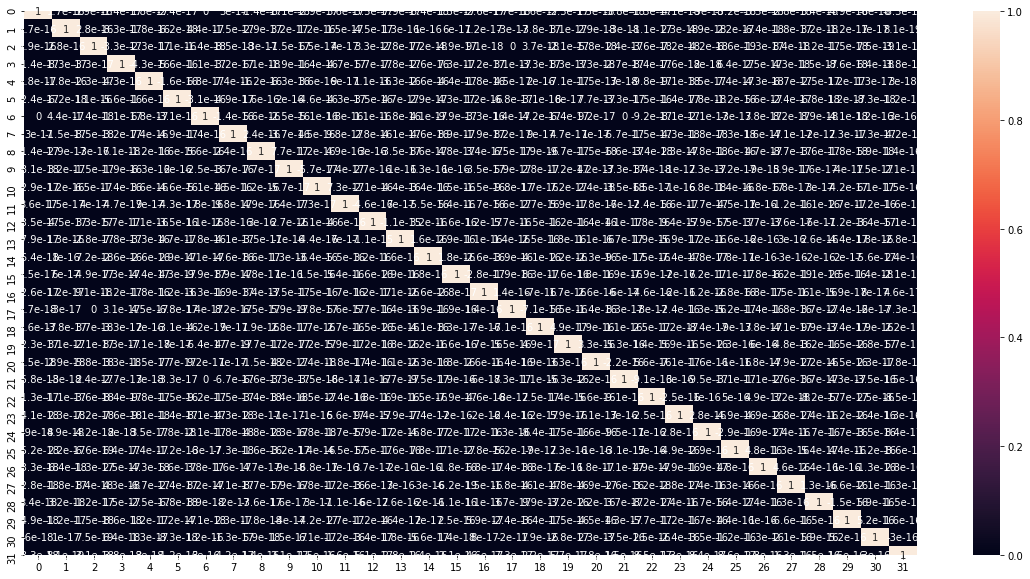

In [125]:
# Plotting the correlation matrix for 32 components.

plt.figure(figsize = (20,10))
sns.heatmap(telecom_corr, annot=True)

From the above heatmap it is clearly that all the features are non-corelated & very close to zero with diagnoal elements equal to 1.

In [126]:
# Checking the Maximum and Minimum Co-relation between features.

telecom_feature_corr = telecom_corr - np.diagflat(telecom_corr.diagonal())
print("Maximum Correlation:", telecom_feature_corr.max(), ", Minimum Correlation: ", telecom_feature_corr.min(),)

Maximum Correlation: 7.360729722531094e-16 , Minimum Correlation:  -1.11528696868905e-15


#### Applying selected components to the test data.

In [127]:
telecom_test_pca = pca_final.transform(Xtest)
telecom_test_pca.shape

(8994, 82)

Running with different n_components and validate the model using Logistic Regression. Here we do fit_transform on training dataset and then only transform on the test dataset. We do not do fit on test dataset in-order to test the model on un-seen data.

#### Building Model-1 and making test data prediction. 

In [128]:
# n_components=40
pca_first_set = PCA(n_components=40)
telecom_train_pca1 = pca_first_set.fit_transform(Xtrain)
telecom_test_pca1 = pca_first_set.transform(Xtest)

telecom_test_pca1.shape

(8994, 40)

In [129]:
# Training the regression model.
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(telecom_train_pca1, y_train)

# Making prediction on the test data.
pred_probs_test1 = model_pca1.predict_proba(telecom_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1)*100)

'84.79'

#### Building Model-2 and making test data prediction. 

In [130]:
# n_components=25
pca_second_set = PCA(n_components=25)
telecom_train_pca2 = pca_second_set.fit_transform(Xtrain)
telecom_test_pca2 = pca_second_set.transform(Xtest)

telecom_test_pca2.shape

(8994, 25)

In [131]:
# Training the regression model.
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(telecom_train_pca2, y_train)

# Making prediction on the test data.
pred_probs_test2 = model_pca2.predict_proba(telecom_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2)*100)

'80.49'

#### Building Model-3 and making test data prediction. 

In [132]:
# n_components=35
pca_third_set = PCA(n_components=35)
telecom_train_pca3 = pca_third_set.fit_transform(Xtrain)
telecom_test_pca3 = pca_third_set.transform(Xtest)

telecom_test_pca3.shape

(8994, 35)

In [133]:
# Training the regression model.
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(telecom_train_pca3, y_train)

# Making prediction on the test data.
pred_probs_test3 = model_pca3.predict_proba(telecom_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3)*100)

'84.36'

### PCA with Logistic Regression.

In [134]:
print("Telecom Churn Ratio:")
print(high_value_customer.telecom_churn.value_counts()*100/high_value_customer.shape[0])

Telecom Churn Ratio:
0   91.36
1    8.64
Name: telecom_churn, dtype: float64


Since churn rate is about 8.6%, we need to handle class imbalance.It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative).

In [175]:
# Import pipeline --> Pipeline utility to help automate machine learning workflows.
from sklearn.pipeline import Pipeline

telecom_balanced = [("pca", PCA(n_components=32)), ("logistic", LogisticRegression(class_weight='balanced'))]
## Using 32 components because we found that 32 components explained 90% of variance.

tele_balance = Pipeline(telecom_balanced)

In [176]:
tele_balance.fit(Xtrain, y_train)

# Now finding the score on train data.
print(round(tele_balance.score(Xtrain, y_train)*100))

77.0


### Evaluate Test Data.

In [177]:
# Getting the predicted values on the test data-set.
y_test_pred_pipeline = tele_balance.predict(Xtest)

In [178]:
telecom_pipeline_matrix = metrics.confusion_matrix(y_test, y_test_pred_pipeline)
print(telecom_pipeline_matrix)

[[6265 1914]
 [ 180  635]]


In [179]:
print(round(metrics.accuracy_score(y_test, y_test_pred_pipeline)*100))

77.0


In [180]:
TP = telecom_pipeline_matrix[1,1] # true positive 
TN = telecom_pipeline_matrix[0,0] # true negatives
FP = telecom_pipeline_matrix[0,1] # false positives
FN = telecom_pipeline_matrix[1,0] # false negatives

In [181]:
# Sensitivity / Recall - True Positive Rate.
print(round(TP/float(TP + FN)*100))

78.0


In [182]:
# Specificity - True Negative Rate.
print(round(TN/float(TN + FP)*100))

77.0


### Tuning the Hyper-Parameter using PCA and LR.

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# PCA
telecom_pca = PCA()

# logistic regression - We need to adjust the cost function.
logistic = LogisticRegression(class_weight='balanced')

# Create pipeline here.
steps = [("pca", telecom_pca), ("logistic", logistic)]
        
# Compile Pipeline.
pca_logistic = Pipeline(steps)

# Hyperparameter space.
params = {'pca__n_components': [30, 80], 'logistic__C': [0.1, 0.5, 1, 2]}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [184]:
# Fit the model first.
model.fit(Xtrain, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                   

In [185]:
# Looking at the important hyperparameters.

print("Telecom Area Under Curve - AUC : ", model.best_score_)
print("Telecom hyperparameters: ", model.best_params_)

Telecom Area Under Curve - AUC :  0.864982414814415
Telecom hyperparameters:  {'logistic__C': 0.1, 'pca__n_components': 80}


### Evaluate Test Data.

In [187]:
# Getting the predicted values on the test data-set.
y_test_pred = model.predict(Xtest)

In [188]:
telecom_cm_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(telecom_cm_matrix)

[[6352 1827]
 [ 137  678]]


#### Accuracy Metrics

In [189]:
print(round(metrics.accuracy_score(y_test, y_test_pred)*100))

78.0


In [190]:
TP = telecom_cm_matrix[1,1] # true positive 
TN = telecom_cm_matrix[0,0] # true negatives
FP = telecom_cm_matrix[0,1] # false positives
FN = telecom_cm_matrix[1,0] # false negatives

It is more important to identify churners than the non-churners accurately.

In [191]:
# Sensitivity / Recall - True Positive Rate.
print(round(TP/float(TP + FN)*100))

83.0


In [192]:
# Specificity - True Negative Rate.
print(round(TN/float(TN + FP)*100))

78.0


#### From the above results we found that Accuracy,Recall & Specificity increased after Hyper-paramerter tuning.
#### Accuracy increased from 77% to 78%, Recall increased from 78% to 83%, Specificity increased from 77% to 78%.